## cnn_cifar10.ipynb

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torchvision

In [7]:
trainset = torchvision.datasets.CIFAR10(
    root = "./data",
    train = True,
    download= True,
    transform = torchvision.transforms.ToTensor()
)

170499072it [01:08, 2494761.15it/s]                               
Extracting ./data\cifar-10-python.tar.gz to ./data


In [8]:
classes = (
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck"
)

In [9]:
type(trainset)

torchvision.datasets.cifar.CIFAR10

In [10]:
trainloader = torch.utils.data.DataLoader(trainset)

In [11]:
type(trainloader)

torch.utils.data.dataloader.DataLoader

In [12]:
data_iter = iter(trainloader)
type(data_iter)

torch.utils.data.dataloader._SingleProcessDataLoaderIter

In [30]:
images, labels = data_iter.next()
print(images.shape)
print(labels.item())

torch.Size([1, 3, 32, 32])
9


In [18]:
# (1, 3, 32, 32)
# 1 : Batch Size
# 3 : channel in input
# 32, 32 : image의 크기

In [31]:
classes[labels.item()]

'truck'

In [49]:
trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size = 4,
    shuffle = True
)

data_iter = iter(trainloader)
images, labels = data_iter.next()
print(images.shape)

torch.Size([4, 3, 32, 32])


In [50]:
labels

tensor([6, 4, 0, 3])

In [51]:
image_data = images[0]
image_data.shape

torch.Size([3, 32, 32])

In [42]:
type(image_data)

torch.Tensor

In [43]:
image_data

tensor([[[0.5373, 0.5451, 0.5529,  ..., 0.6627, 0.6275, 0.6275],
         [0.5216, 0.5255, 0.5255,  ..., 0.6039, 0.5843, 0.6000],
         [0.5255, 0.5294, 0.5294,  ..., 0.6078, 0.6039, 0.5725],
         ...,
         [0.7765, 0.7725, 0.7490,  ..., 0.5333, 0.5412, 0.5490],
         [0.7647, 0.7529, 0.7412,  ..., 0.5451, 0.5529, 0.5608],
         [0.7373, 0.7529, 0.7725,  ..., 0.5647, 0.5686, 0.5686]],

        [[0.5412, 0.5490, 0.5569,  ..., 0.6745, 0.6392, 0.6431],
         [0.5255, 0.5294, 0.5294,  ..., 0.6157, 0.5961, 0.6118],
         [0.5255, 0.5294, 0.5294,  ..., 0.6235, 0.6157, 0.5843],
         ...,
         [0.8078, 0.8039, 0.7765,  ..., 0.5333, 0.5451, 0.5529],
         [0.7922, 0.7804, 0.7608,  ..., 0.5490, 0.5569, 0.5647],
         [0.7647, 0.7804, 0.8000,  ..., 0.5686, 0.5725, 0.5725]],

        [[0.5137, 0.5216, 0.5294,  ..., 0.5922, 0.5608, 0.5608],
         [0.5059, 0.5098, 0.5098,  ..., 0.5373, 0.5294, 0.5451],
         [0.5137, 0.5176, 0.5176,  ..., 0.5373, 0.5373, 0.

In [52]:
np_image = image_data.numpy()

In [53]:
np_image.shape

(3, 32, 32)

In [55]:
np_image = np.transpose(np_image, (1, 2, 0))

In [56]:
np_image.shape

(32, 32, 3)

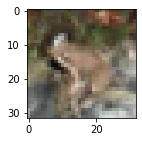

In [57]:
plt.figure(figsize = (2, 2))
plt.imshow(np_image)
plt.show()

In [58]:
print(classes[labels[0].item()])

frog


In [62]:
def image_show(image_data, label):
    np_image = image_data.numpy()
    np_image = np.transpose(np_image, (1, 2, 0))
    plt.figure(figsize = (2, 2))
    plt.imshow(np_image)
    plt.title(label)
    plt.show()

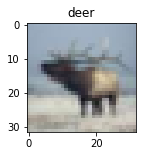

In [63]:
image_show(images[1], classes[labels[1].item()])

In [77]:
# First Convolution Layer
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 5, 3) # (입력 채널의 수, 출력 채널의 수, 커널 사이즈) kernel size 3 => (3, 3)의 matrix

    def forward(self, x):
        y = self.conv1(x)
        return y

In [78]:
cnn = FirstCNN()

In [79]:
out = cnn(images)

In [80]:
print(out.shape)

torch.Size([4, 5, 30, 30])


In [68]:
# (4, 10, 30, 30)
# 4: 이미지의 갯수 batch_size
# 10 : 출력 채널의 수
# (30, 30) : 결과 이미지의 크기
# default padding = (0, 0), stride = (1, 1)

In [81]:
type(out)

torch.Tensor

In [82]:
out.shape

torch.Size([4, 5, 30, 30])

In [83]:
sample = out[0, 0, :, :]
sample.shape

torch.Size([30, 30])

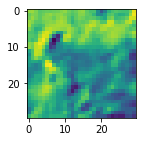

In [84]:
plt.figure(figsize = (2, 2))
plt.imshow(sample.detach().numpy())
plt.show()

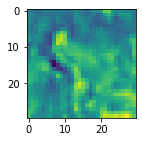

In [85]:
sample = out[0, 1, :, :]
plt.figure(figsize = (2, 2))
plt.imshow(sample.detach().numpy())
plt.show()

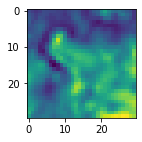

In [87]:
sample = out[0, 4, :, :]
plt.figure(figsize = (2, 2))
plt.imshow(sample.detach().numpy())
plt.show()

In [88]:
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 3, 
            padding = (1, 1)
        ) # (입력 채널의 수, 출력 채널의 수, 커널 사이즈) kernel size 3 => (3, 3)의 matrix

    def forward(self, x):
        y = self.conv1(x)
        return y

In [89]:
cnn = FirstCNN()

In [90]:
out = cnn(images)

In [91]:
out.shape

torch.Size([4, 10, 32, 32])

In [92]:
sample = out[0, 0, :, :]
sample.shape

torch.Size([32, 32])

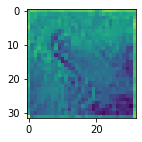

In [93]:
plt.figure(figsize = (2, 2))
plt.imshow(sample.detach().numpy())
plt.show()

In [98]:
class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 10, 3, 
            # padding = (1, 1),
            stride = (2, 2)
        ) # (입력 채널의 수, 출력 채널의 수, 커널 사이즈) kernel size 3 => (3, 3)의 matrix

    def forward(self, x):
        y = self.conv1(x)
        return y

In [99]:
cnn = FirstCNN()
out = cnn(images)
out.shape

torch.Size([4, 10, 15, 15])

In [100]:
sample = out[0, 0, :, :]
sample.shape


torch.Size([15, 15])

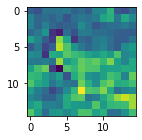

In [101]:
plt.figure(figsize = (2, 2))
plt.imshow(sample.detach().numpy())
plt.show()

In [102]:
# DeepCNN
class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 10, 3),
            nn.Conv2d(10, 5, 3)
        )

    def forward(self, x):
        y = self.model(x)
        return y

In [103]:
# DeepCNN 클래스에서
# 1st CNN Layer : Kernel size = (3, 3) | output 채널의 수 = 10 | padding (0, 0) | stride = (1, 1)
# 2st CNN Layer : Kernel size = (3, 3) | output 채널의 수 = 5 | padding (0, 0) | stride = (1, 1)

In [104]:
deep = DeepCNN()
out = deep(images)
print(out.shape)

torch.Size([4, 5, 28, 28])


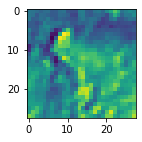

In [105]:
sample = out[0, 0, :, :]
plt.figure(figsize = (2, 2))
plt.imshow(sample.detach().numpy())
plt.show()

In [106]:
# PoolingCNN
class avg_pool(nn.Module):
    def __init__(self):
        super(avg_pool, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 10, 3),
            nn.Conv2d(10, 5, 3),
            nn.AvgPool2d(2, stride = 2)
        )

    def forward(self, x):
        y = self.model(x)
        return y

In [107]:
avg = avg_pool()
out = avg(images)
print(out.shape)

torch.Size([4, 5, 14, 14])


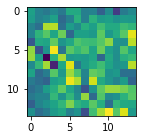

In [108]:
sample = out[0, 0, :, :]
plt.figure(figsize = (2, 2))
plt.imshow(sample.detach().numpy())
plt.show()

In [111]:
# Max Pool CNN
class max_pool(nn.Module):
    def __init__(self):
        super(max_pool, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 10, 3),
            nn.Conv2d(10, 5, 3),
            nn.MaxPool2d(2, stride = 2)
        )

    def forward(self, x):
        y = self.model(x)
        return y

In [112]:
max_p = max_pool()
out = max_p(images)
print(out.shape)

torch.Size([4, 5, 14, 14])
c:\20210626\venv\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


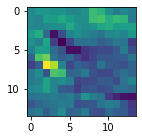

In [113]:
sample = out[0, 0, :, :]
plt.figure(figsize = (2, 2))
plt.imshow(sample.detach().numpy())
plt.show()